# Credit card fraud detection capstone project

This jupyter notebook presents the implementation of credit card fraud detection technique based on Machile Learning models.

### Loading the packages and the data used in the project.

In [1]:
#Importing all packages necessary to implement the classification in fraud or non-fraud.
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import imblearn
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score


#pd.set_option('display.max_rows',None)
pd.reset_option("display.max_rows")
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [2]:
#Importing the dataset used to train and test the machine learning models
fraudPD = pd.read_csv('..\CreditCardFraudDetectionData\IEEE-CIS Fraud Detection-Transactions.csv')

In [3]:
#Let's explore the fraud data used in this project
pd.set_option('display.max_columns', None)
fraudPD.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
#Let's know the shape of the data
fraudPD.shape

(590540, 394)

In [5]:
#It is very important to check the amount of null values to determine how to take care of them.
fraudPD.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [6]:
#This cell changes the timestamp datetime to a readable date format.
fraudPD['time'] = fraudPD['TransactionDT'].apply(lambda x: datetime.fromtimestamp(x).strftime("%A, %B %d, %Y %I:%M:%S"))

In [7]:
fraudPD.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,time
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Thursday, January 01, 1970 04:00:00"
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0

In [8]:
#Grouping the data in fraud and non-fraud to check the data balance.
transGroup = fraudPD[['isFraud','TransactionID']].groupby(['isFraud'], dropna=False).agg('count').reset_index()
transGroup.columns = ['isFraud','count']
transGroup

,isFraud,count
0,0,569877
1,1,20663


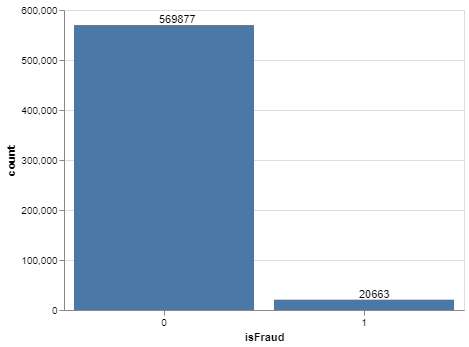

In [9]:
#Implementing a bar chart to check the data balance as fraud and non-fraud visually.
bar_chart=alt.Chart(transGroup).mark_bar().encode(alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)), y='count:Q')
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400)

The data is very unbalanced, and it must be balanced before presenting it to a machine-learning model.

### A quick exploratory data analysis.

Grouping by product code, the product for each transaction. Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.

In [10]:
productCDGroup = fraudPD[['ProductCD','TransactionID']].groupby(['ProductCD'], dropna=False).agg('count').reset_index()
productCDGroup.columns = ['ProductCD','count']

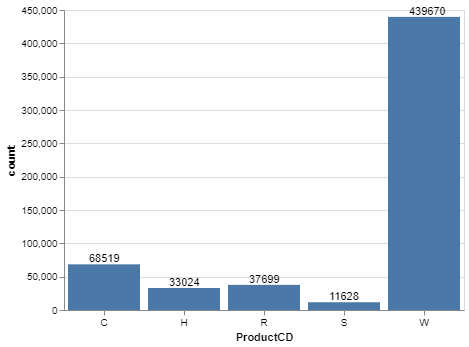

In [11]:
bar_chart=alt.Chart(productCDGroup).mark_bar().encode(alt.X('ProductCD:N', axis=alt.Axis(labelAngle=0)), y='count:Q')
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-15).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400)

The bar chart illustrates the dataset distribution of product types.

In [12]:
#Grouping the data according to the card types.
card4Group = fraudPD[['card4','TransactionID']].groupby(['card4'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','count']

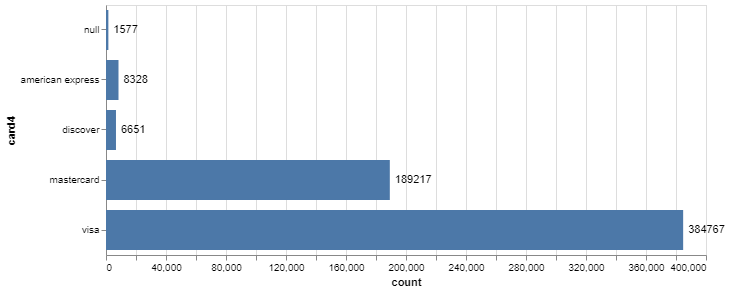

In [13]:
#The bar chart presents the amount of each credit card brand used in the transactions.
bar_chart=alt.Chart(card4Group).mark_bar(size=40).encode(x='count:Q',y='card4:N')
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600)

In [14]:
#Grouping and counting the transactions according to credit card types.
card6Group = fraudPD[['card6','TransactionID']].groupby(['card6'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','count']

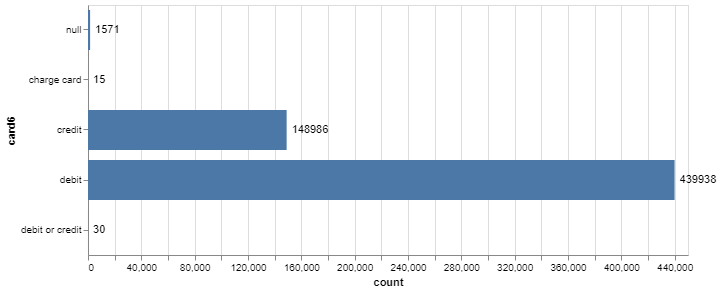

In [15]:
#Visually presenting the amount of transactions according to credit card type.
bar_chart=alt.Chart(card6Group).mark_bar(size=40).encode(x='count:Q',y='card6:N')
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600)

In [16]:
#Grouping the transactions by credit brand and transaction type (genuine or fraudulent).
card4Group = fraudPD[['card4','TransactionID','isFraud']].groupby(['card4','isFraud'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','isFraud','count']

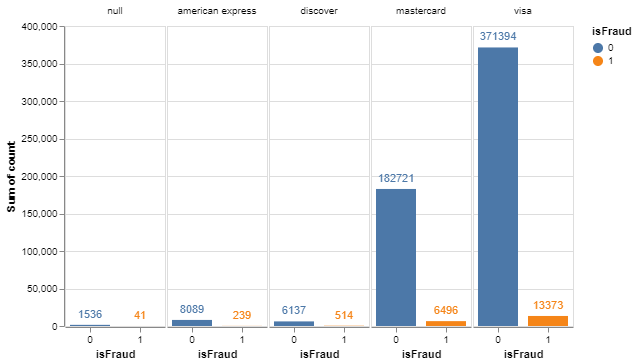

In [17]:
#Let's visually check the number of credit-type transactions that are fraudulent or genuine.
bar_chart = alt.Chart(card4Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q"),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card4:N", title=None)
).configure_facet(spacing=0)


One can verify the number of transactions for each card brand in the graphic. Visa card is the most used one, followed by Mastercard.

In [18]:
#Let's group the transactions by card type (credit or debit) divided by fraudulent or legitimate transactions.
card6Group = fraudPD[['card6','TransactionID','isFraud']].groupby(['card6','isFraud'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','isFraud','count']

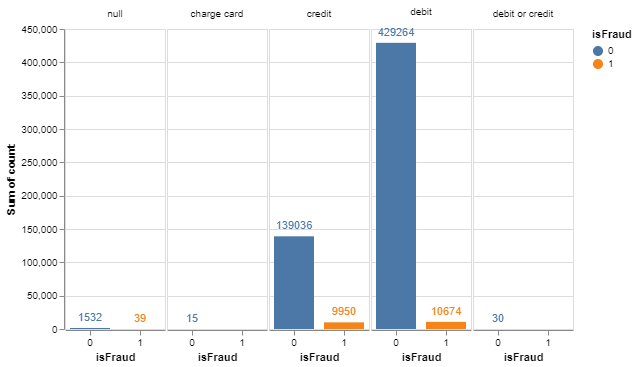

In [19]:
#One can see the distribution of transactions by card and type of transactions.
bar_chart = alt.Chart(card6Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q"),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card6:N", title=None)
).configure_facet(spacing=0)

The graphic shows most transactions executed using debit cards followed by credit cards.

In [20]:
#One exciting piece of information compares the purchase profiles of legitimate and fraudulent transactions. 
#Let's calculate the average purchase amounts by legitimate and fraudulent transactions.
tAmountdf = fraudPD[['isFraud','TransactionAmt']].groupby('isFraud').mean().reset_index()

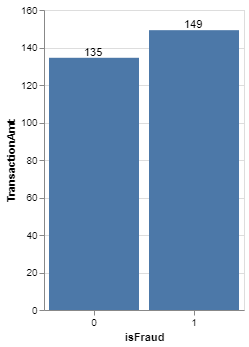

In [21]:
#One can check the purchase amount average for each kind of transaction.
bar_chart=alt.Chart(tAmountdf).mark_bar().encode(
    x=alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)),
    y='TransactionAmt:Q')

bar_text = bar_chart.mark_text(align='left', baseline='bottom', dx=-10).encode(text=alt.X('TransactionAmt:Q', format=".0f"))

(bar_chart + bar_text).properties(width=200)

The graphic shows not too different scenários for fraudulent transactions and legitimate transactions. On average, the purchases cost 135 dólares, and the legitimate transactions cost 149 dólares. It seems that fraudsters usually try to simulate legitimate transactions to avoid fraudulent transaction prevention systems.

In [22]:
#Let's unpivot a wide to long format fraud data frame to have P_emaildomain and R_emaildomain as columns.
fraudMelt=pd.melt(fraudPD[['TransactionID','P_emaildomain','R_emaildomain']], 
                  id_vars=['TransactionID'], 
               value_vars=['P_emaildomain', 'R_emaildomain'], ignore_index=False)

#So, one can count how many domains are present in the transactions.
fraudMelt=fraudMelt[['variable','value']].value_counts().reset_index()
fraudMelt.columns = ['stakeholder','domain','count']

#Then, one can count how many transactions for the first five domain addresses.
fraudGrp = fraudMelt[['domain','count']].groupby('domain').sum().sort_values('count', ascending=False).head(5)
fraudMelt=fraudMelt.merge(fraudGrp, how='inner', on='domain')[['stakeholder','domain','count_x']]
fraudMelt.columns = ['stakeholder','domain','count']

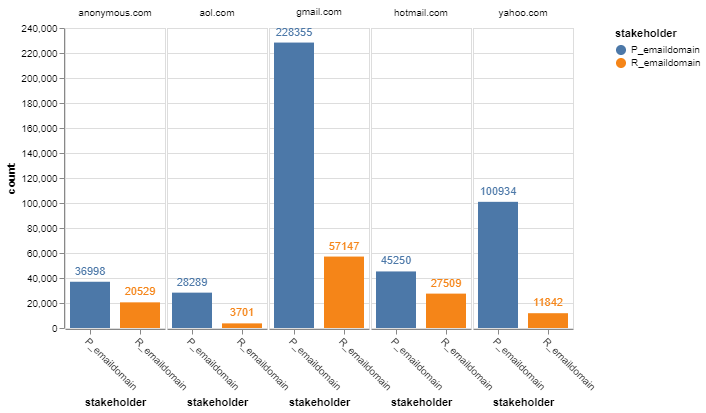

In [23]:
#Let's see the graphic of the email domain address distribution for purchasers and recipients
bar_chart = alt.Chart(fraudMelt).encode(
    alt.X("stakeholder:O", axis=alt.Axis(labelAngle=45)),
    alt.Y("count:Q"),
    alt.Color("stakeholder:N"),
    alt.Text("count:Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("domain:N", title=None)
).configure_facet(spacing=0)

The previous graphic presents the distribution of email addresses for purchasers and recipients by domain. One can see that the main email domains used are gmail.com, followed by yahoo.com and hotmail.com.

In [24]:
#Let's drop the null values for now. I need to understand the data better to fill the null values with information.
notnaFraud=fraudPD[['isFraud',
                'TransactionAmt',
                'ProductCD',
                'card1',
                'card4',
                'card6',
                'addr1',
                'addr2',
                'P_emaildomain',
                'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']].dropna()

In [25]:
#How many rows and columns does my not null data have?
notnaFraud.shape

(431503, 23)

In [26]:
#Now, we have no null values in the data to present to a machine learning model.
notnaFraud.isna().sum()

isFraud           0
TransactionAmt    0
ProductCD         0
card1             0
card4             0
card6             0
addr1             0
addr2             0
P_emaildomain     0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
dtype: int64

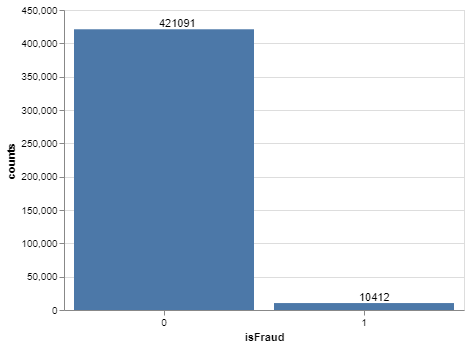

In [27]:
#After dropping the null values, this data is available to the machine learning model. 
#It is still an excellent amount of data.
bar_chart = alt.Chart(notnaFraud[['isFraud']].value_counts().reset_index().rename(columns={0:'counts'})).mark_bar().encode(
    y='counts:Q',
    x=alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)))
bar_chart
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='counts:Q')
(bar_chart + text_chart).properties(height=300, width=400)

The graphic shows the nonnull data available to perform further classification.

In [28]:

factFraud=notnaFraud[['ProductCD','card4','card6','P_emaildomain']].apply(lambda x : pd.factorize(x)[0])
factFraud.shape

(431503, 4)

In [29]:
fraud=pd.concat([notnaFraud[['TransactionAmt',
                             'card1',
                             'addr1',
                             'addr2','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']], factFraud], axis=1)

<Axes: >

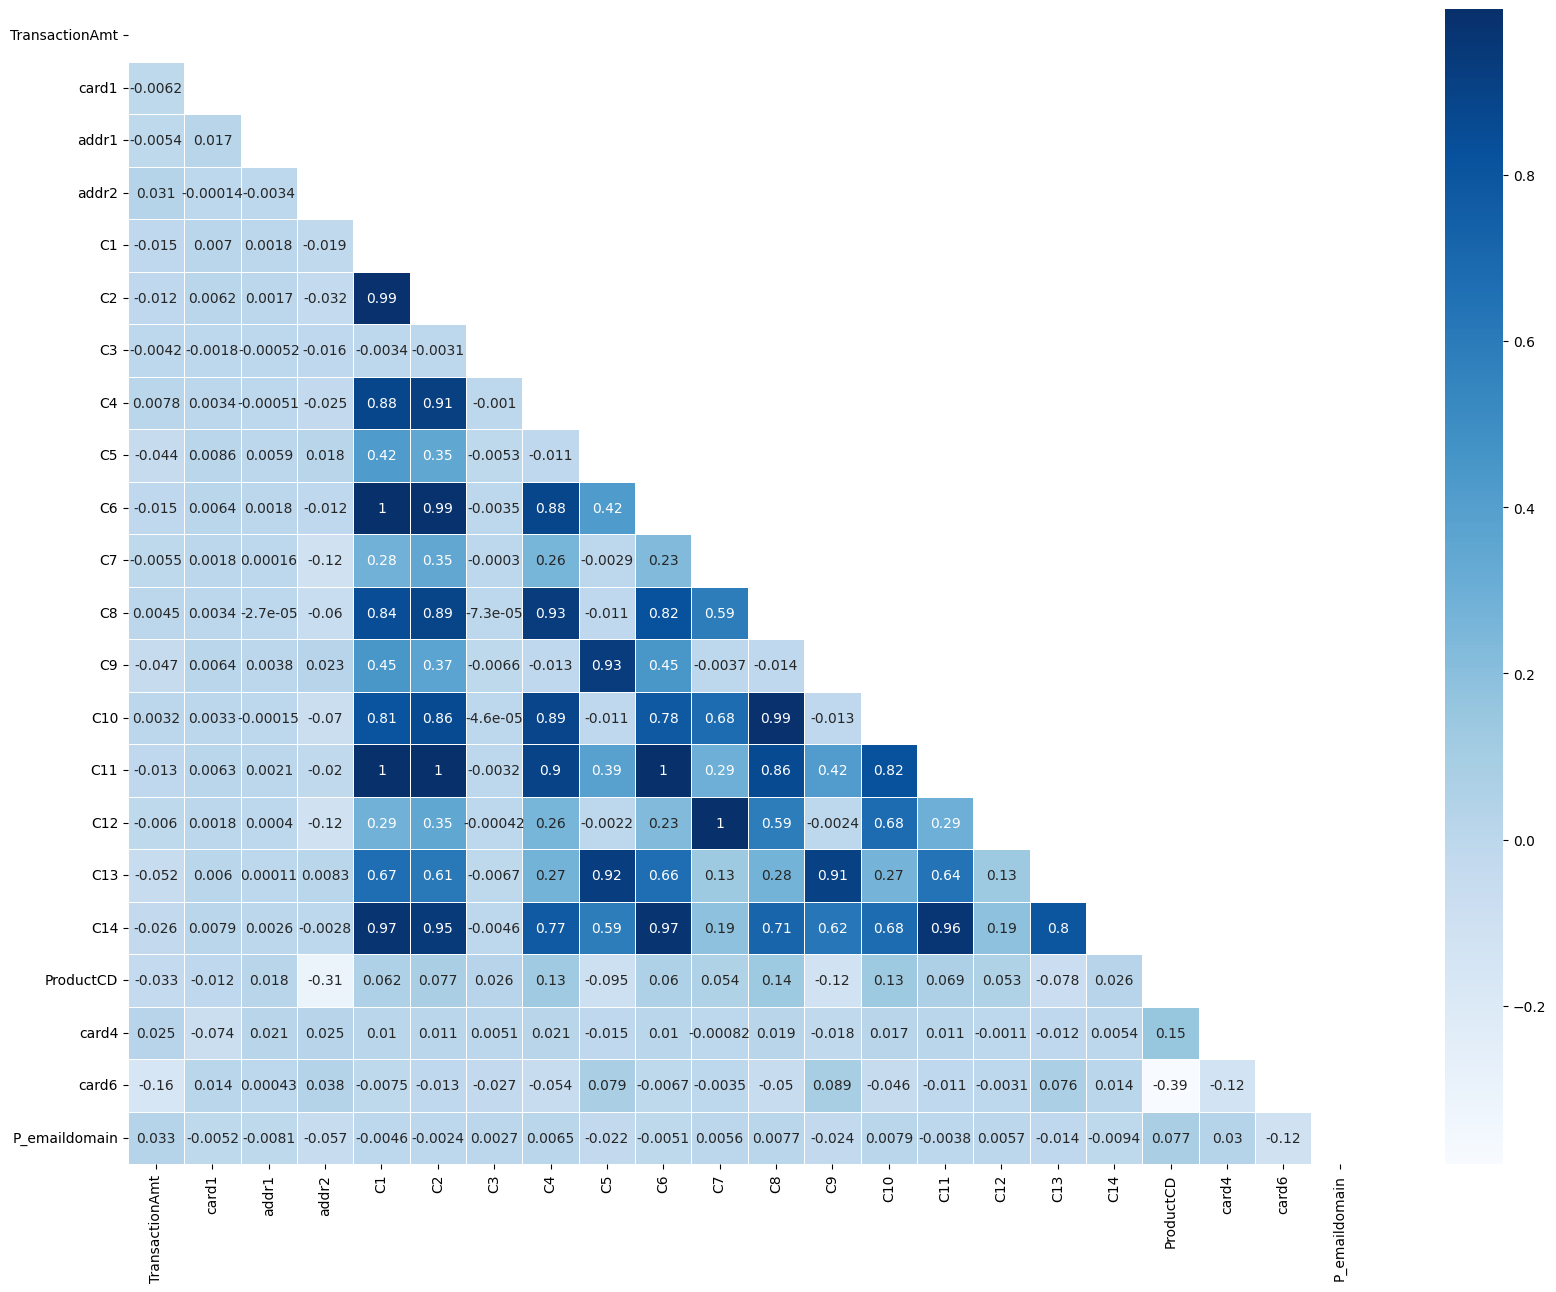

In [31]:
plt.subplots(figsize=(20,15))
sns.heatmap(fraud.corr(), cmap="Blues", annot=True, linewidths=.5, mask=np.triu(fraud.corr()))

In [32]:
fraud=pd.concat([fraud, notnaFraud[['isFraud']]], axis=1)

In [57]:
fraud.head()

,TransactionAmt,card1,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,ProductCD,card4,card6,P_emaildomain,isFraud
1,29.0,2755,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0,0,0,0
2,59.0,4663,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,1,1,1,0
3,50.0,18132,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,0,0,1,2,0
4,50.0,4497,420.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,0,0,0
5,49.0,5937,272.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,1,1,0,0


In [34]:
X=fraud[['TransactionAmt','card1','addr1','addr2','ProductCD','card4','card6','P_emaildomain',
        'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']]
y=fraud['isFraud']

In [35]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

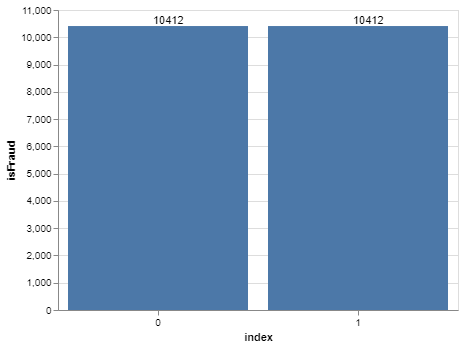

In [55]:
bar_chart = alt.Chart(y_rus.value_counts().reset_index().rename(columns={0:'counts'})).mark_bar().encode(
    y='isFraud:Q',
    x=alt.X('index:N', axis=alt.Axis(labelAngle=0)))
bar_chart
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='isFraud:Q')
(bar_chart + text_chart).properties(height=300, width=400)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.20, random_state=17)

In [37]:
my_standard_scaler = StandardScaler()

my_standard_scaler.fit(X_train[['TransactionAmt','card1','addr1','addr2', 
                                'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']])

X_trainScaledfraud = pd.DataFrame(my_standard_scaler.transform(X_train[['TransactionAmt','card1','addr1','addr2',
                                                                       'C1','C2','C3','C4','C5','C6','C7','C8','C9',
                                                                        'C10','C11','C12','C13','C14']])).reset_index()

X_trainTmpFraud = X_train[['ProductCD','card4','card6','P_emaildomain']].reset_index()

X_train=pd.concat([X_trainScaledfraud, X_trainTmpFraud], ignore_index=True, axis=1)

X_train.columns = ['index','TransactionAmt','card1','addr1','addr2', 
                   'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
                   'index1', 'ProductCD','card4','card6','P_emaildomain']

X_train=X_train[['TransactionAmt','card1','addr1','addr2', 
                 'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
                 'ProductCD','card4','card6','P_emaildomain']]

In [38]:
X_testScaledfraud = pd.DataFrame(my_standard_scaler.transform(X_test[['TransactionAmt','card1','addr1','addr2',
                                                                     'C1','C2','C3','C4','C5','C6','C7','C8',
                                                                      'C9','C10','C11','C12','C13','C14']])).reset_index()

X_testTmpFraud = X_test[['ProductCD','card4','card6','P_emaildomain']].reset_index()

X_test=pd.concat([X_testScaledfraud, X_testTmpFraud], ignore_index=True, axis=1)

X_test.columns = ['index','TransactionAmt','card1','addr1','addr2', 
                  'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
                  'index1', 'ProductCD','card4','card6','P_emaildomain']

X_test=X_test[['TransactionAmt','card1','addr1','addr2', 
               'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
               'ProductCD','card4','card6','P_emaildomain']]

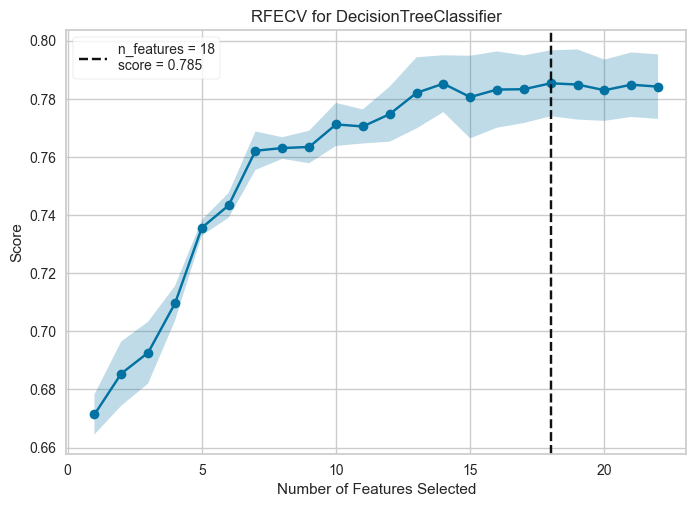

<Axes: title={'center': 'RFECV for DecisionTreeClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [39]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

cv = StratifiedKFold(5)
visualizer = RFECV(tree.DecisionTreeClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X_train, y_train)
visualizer.show()

In [40]:
mask = visualizer.get_support()
mask
features = np.array(['TransactionAmt','card1','addr1','addr2', 
                     'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
                     'ProductCD','card4','card6','P_emaildomain'])
best_features = features[mask]

print("Selected best: ", best_features.shape[0])
print(features[mask])

Selected best:  18
['TransactionAmt' 'card1' 'addr1' 'C1' 'C2' 'C4' 'C5' 'C6' 'C8' 'C9' 'C11'
 'C12' 'C13' 'C14' 'ProductCD' 'card4' 'card6' 'P_emaildomain']


In [41]:
BestX_train = X_train[list(features[mask])]

BestX_test = X_test[list(features[mask])]

In [42]:
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = tree.DecisionTreeClassifier(random_state=0)
# define search space
space = dict()
space['max_depth'] = [5, 10, 15]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, BestX_train, y_train, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.788 (0.011)


In [43]:
scores

array([0.7665066 , 0.79051621, 0.78571429, 0.79171669, 0.78211285,
       0.80492197, 0.80732293, 0.78571429, 0.78151261, 0.78618619])

In [44]:
clf = search.fit(BestX_train, y_train)
predTree = clf.predict(BestX_test)
print(f"{accuracy_score(y_test, predTree):.2%}")

79.57%


In [45]:
clf.best_params_

{'max_depth': 15}

In [46]:
#plt.figure(figsize = (20,16))
#tree.plot_tree(clf, fontsize = 16,rounded = True , filled = True)
#plt.show()